In [4]:
import os
import pandas as pd
import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
def load_process_data(ticker, start_date, end_date, dealNaN=True, drop_NaN=True, split_by_ratio=False, split_by_date=False, split_by_randomly=True, split_date=None, scale=True):
    DATA_DIR = 'stock_data'
    
    test_size = 0.2
    feature_columns = ["Open","High","Low","Close","Adj Close"]
    
    # Check if the data directory exists, if not, create it
    if not os.path.exists(DATA_DIR):
        os.makedirs(DATA_DIR)
        
    # Create a file path for stock price data
    file_path = os.path.join(DATA_DIR, f'{ticker}_{start_date}_{end_date}.csv')
    
    #Load or Download the data
    if os.path.exists(file_path):
        print(f"Loading data from {file_path}")
        data = pd.read_csv(file_path, index_col='Date', parse_dates=True)
    else:
        print(f"Downloading data {ticker} from Yahoo finance")
        data = yf.download(ticker, start_date, end_date)
        data.to_csv(file_path)
        print(f"Data saved to {file_path}")
        
    result = {'data': data.copy()}
    
    print(f"Data samples {len(data)}")
    
    # Handle NaN values
    if dealNaN:
        print("NaN values before handling")
        print(data.isna().sum())
        if drop_NaN is True:
            data.dropna(inplace=True)
        else:
            data.fillna(data.mean(), inplace=True)
        print("NaN values after handling")
        print(data.isna().sum())
    
    # Split data with specified method
    if split_by_ratio:
        print('Splitting by ratio')
        train_samples = int((1-test_size) * len(data))
        
        result['data_train'] = data[:train_samples]
        result['data_test'] = data[train_samples:]
        
        print(f"Training samples: {len(result['data_train'])}")
        print(f"Test samples: {len(result['data_test'])}")
        
    elif split_by_date:
        print('Splitting by date')
        split_date = pd.to_datetime(split_date)
        
        result['data_train'] = data[data.index <= split_date]
        result['data_test'] = data[data.index > split_date]
        
        print(f"Training samples: {len(result['data_train'])}")
        print(f"Test samples: {len(result['data_test'])}")
    
    elif split_by_randomly:
        print('Splitting randomly')
        result['data_train'], result['data_test'] = train_test_split(data, test_size=test_size, shuffle=True)
        
        print(f"Training samples: {len(result['data_train'])}")
        print(f"Test samples: {len(result['data_test'])}")
    
    
    # Optionally scale feature columns
    if scale:
        scaler = MinMaxScaler(feature_range=(0,1))
        data[feature_columns] = scaler.fit_transform(data[feature_columns])
        result['scaled_data'] = data[feature_columns]
        
    return result

In [6]:
TICKER = 'AAPL'
START_DATE = '2020-01-01'
END_DATE = '2023-01-01'

In [7]:
result = load_process_data(ticker=TICKER, start_date=START_DATE, end_date=END_DATE, split_by_date=False, split_by_randomly=False, split_by_ratio=True, split_date='06-01-2021', scale=True)

Loading data from stock_data/AAPL_2020-01-01_2023-01-01.csv
Data samples 756
NaN values before handling
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
NaN values after handling
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Splitting by ratio
Training samples: 604
Test samples: 152


In [8]:
print("Train data in first 5 rows")
print(result['data_train'].head())
print("Test data in first 5 rows")
print(result['data_test'].head())

Train data in first 5 rows
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.796028  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.088280  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.662712  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.320969  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.484352  132079200
Test data in first 5 rows
                  Open        High  ...   Adj Close     Volume
Date                                ...                       
2022-05-25  138.429993  141.789993  ...  138.634827   92482700
2022-05-26  137.389999  144.339996  ...  141.851074   90601500
2022-05-27  145.389999  149.679993  ...  147.632462   90978500
2022-05-31  149.070007  150.660004  ...  146.843155  103718400
2022-06-01  149.899994  151.74

In [9]:
result = load_process_data(ticker=TICKER, start_date=START_DATE, end_date=END_DATE, split_by_date=True, split_by_randomly=False, split_by_ratio=False, split_date='06-01-2021', scale=True)

Loading data from stock_data/AAPL_2020-01-01_2023-01-01.csv
Data samples 756
NaN values before handling
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
NaN values after handling
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Splitting by date
Training samples: 356
Test samples: 400


In [10]:
result = load_process_data(ticker=TICKER, start_date=START_DATE, end_date=END_DATE, split_by_date=False, split_by_randomly=True, split_by_ratio=False, split_date='06-01-2021', scale=True)

Loading data from stock_data/AAPL_2020-01-01_2023-01-01.csv
Data samples 756
NaN values before handling
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
NaN values after handling
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Splitting randomly
Training samples: 604
Test samples: 152


In [11]:
print("Train data in first 5 rows")
print(result['data_train'].head())
print("Test data in first 5 rows")
print(result['data_test'].head())

Train data in first 5 rows
                  Open        High  ...   Adj Close     Volume
Date                                ...                       
2021-12-16  179.279999  181.139999  ...  169.483734  150185800
2020-02-06   80.642502   81.305000  ...   78.821358  105425600
2020-10-02  112.889999  115.370003  ...  110.326843  144712000
2020-07-09   96.262497   96.317497  ...   93.302574  125642800
2020-10-22  117.449997  118.040001  ...  112.991783  101988000

[5 rows x 6 columns]
Test data in first 5 rows
                  Open        High  ...   Adj Close     Volume
Date                                ...                       
2020-05-20   79.169998   79.879997  ...   77.765541  111504800
2021-01-11  129.190002  130.169998  ...  126.123734  100384500
2020-06-16   87.864998   88.300003  ...   85.767921  165428800
2020-12-21  125.019997  128.309998  ...  125.390343  121251600
2021-04-15  133.820007  135.000000  ...  131.718018   89347100

[5 rows x 6 columns]


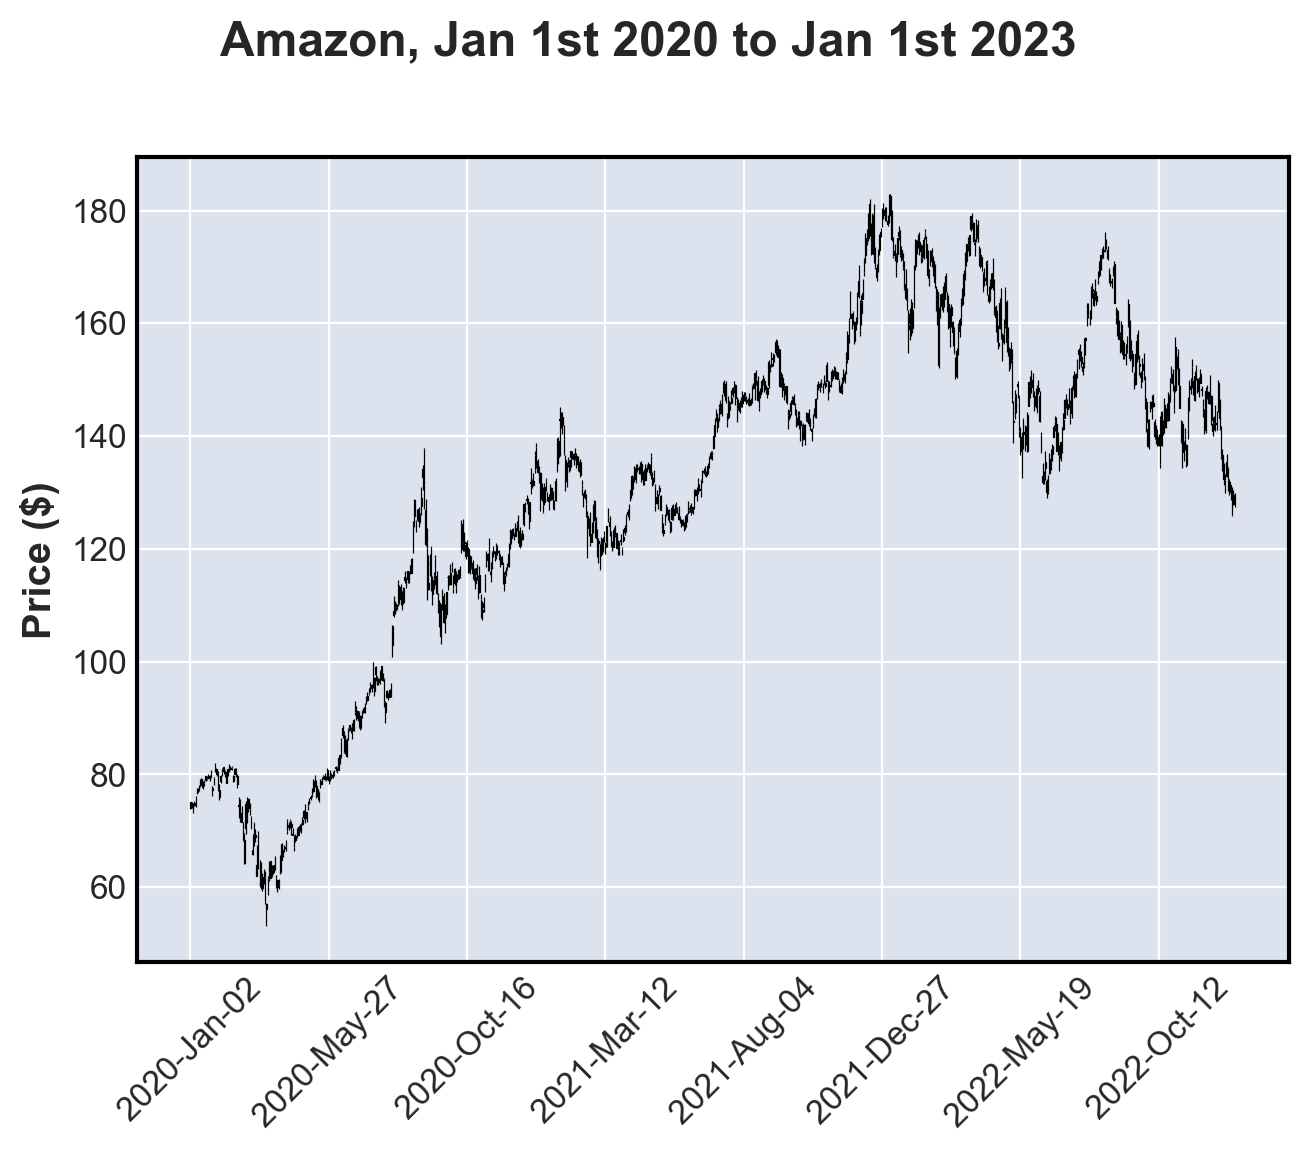

In [12]:
fplt.plot(result['data'], type='candle', title='Amazon, Jan 1st 2020 to Jan 1st 2023', ylabel='Price ($)')

In [29]:
# https://www.youtube.com/watch?v=tJ2nGxERbbM
def candlestick_chart(data, n):
    if (n > 0):
        data = data.resample(f"{n}D").agg({
            "Open":"first",
            "High":"max",
            "Low":"min",
            "Close":"last",
            "Volume":"sum"
        })
        
        fplt.plot(data, type='candle', title='Amazon, Jan 1st 2020 to Jan 1st 2023', ylabel='Price ($)')
        print(data.dtypes)
        print(data)
    else:
        print("Please more than a trading day")

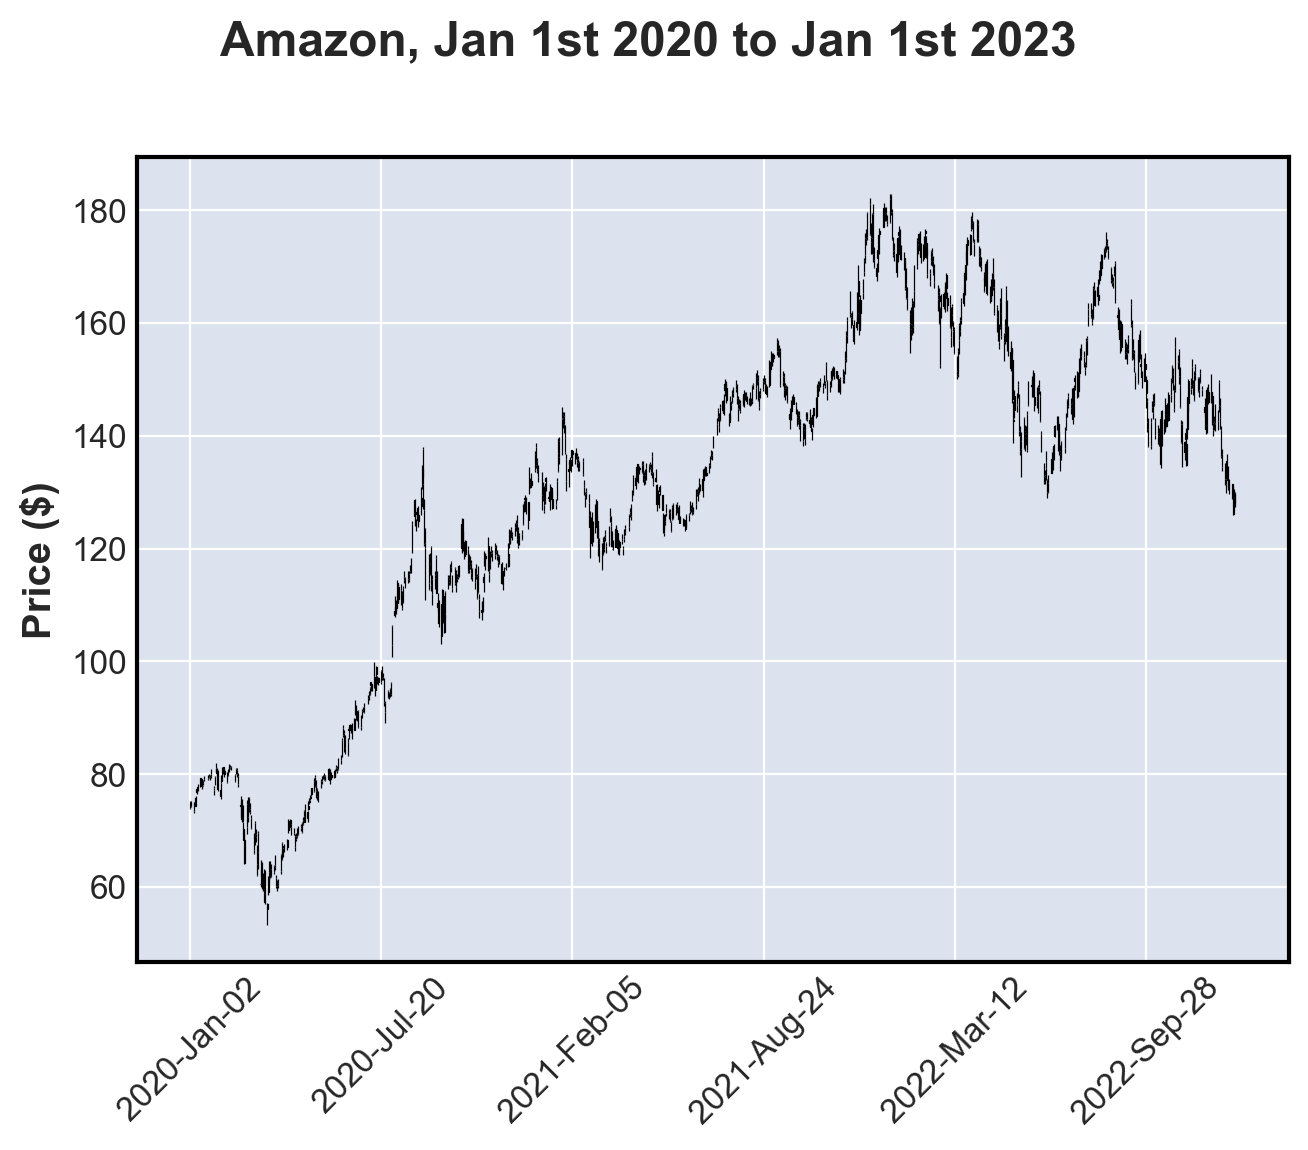

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object
                  Open        High         Low       Close     Volume
Date                                                                 
2020-01-02   74.059998   75.150002   73.797501   75.087502  135480400
2020-01-03   74.287498   75.144997   74.125000   74.357498  146322800
2020-01-04         NaN         NaN         NaN         NaN          0
2020-01-05         NaN         NaN         NaN         NaN          0
2020-01-06   73.447502   74.989998   73.187500   74.949997  118387200
...                ...         ...         ...         ...        ...
2022-12-26         NaN         NaN         NaN         NaN          0
2022-12-27  131.380005  131.410004  128.720001  130.029999   69007800
2022-12-28  129.669998  131.029999  125.870003  126.040001   85438400
2022-12-29  127.989998  130.479996  127.730003  129.610001   75703700
2022-12-30  128.410004  129.949997  127.430000  129.9299

In [30]:
candlestick_chart(result['data'], 1)

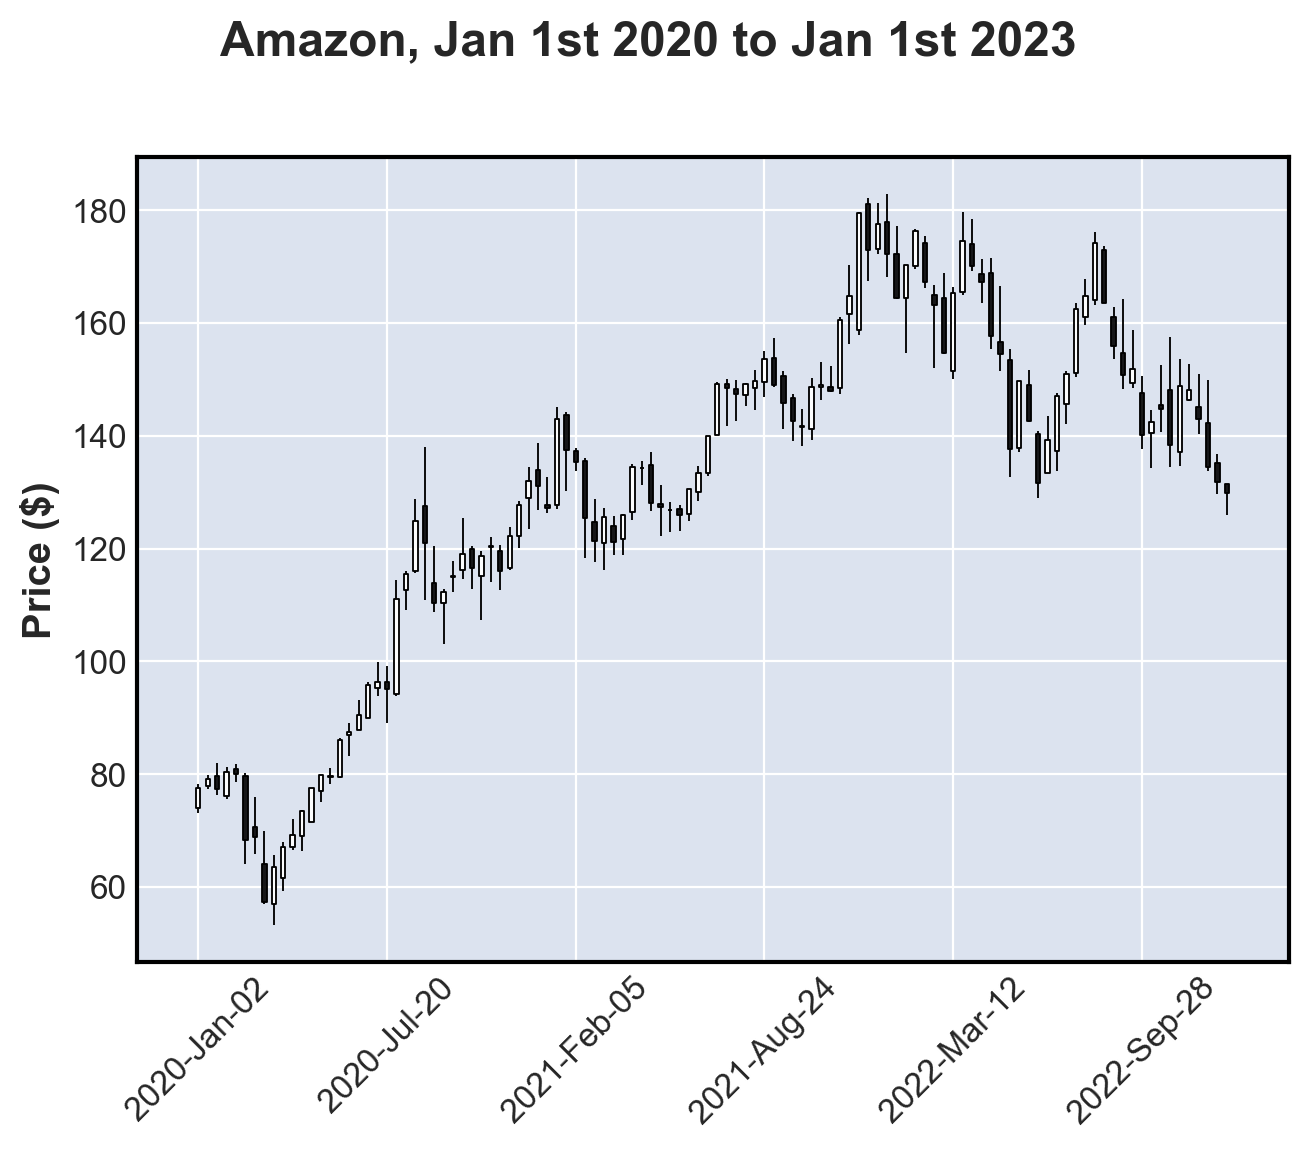

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object
                  Open        High         Low       Close      Volume
Date                                                                  
2020-01-02   74.059998   78.167503   73.187500   77.582497   951894800
2020-01-12   77.910004   79.754997   77.387497   79.142502   762898800
2020-01-22   79.644997   81.962502   76.220001   77.377502  1219576800
2020-02-01   76.074997   81.305000   75.555000   80.387497   761690000
2020-02-11   80.900002   81.805000   78.652496   80.074997   729996000
...                ...         ...         ...         ...         ...
2022-11-17  146.429993  152.699997  146.149994  148.110001   359244500
2022-11-27  145.139999  150.919998  140.350006  142.910004   534642100
2022-12-07  142.190002  149.970001  133.729996  134.509995   713675300
2022-12-17  135.110001  136.809998  129.639999  131.860001   384620400
2022-12-27  131.380005  131.410004  125.8700

In [31]:
candlestick_chart(result['data'], 10)

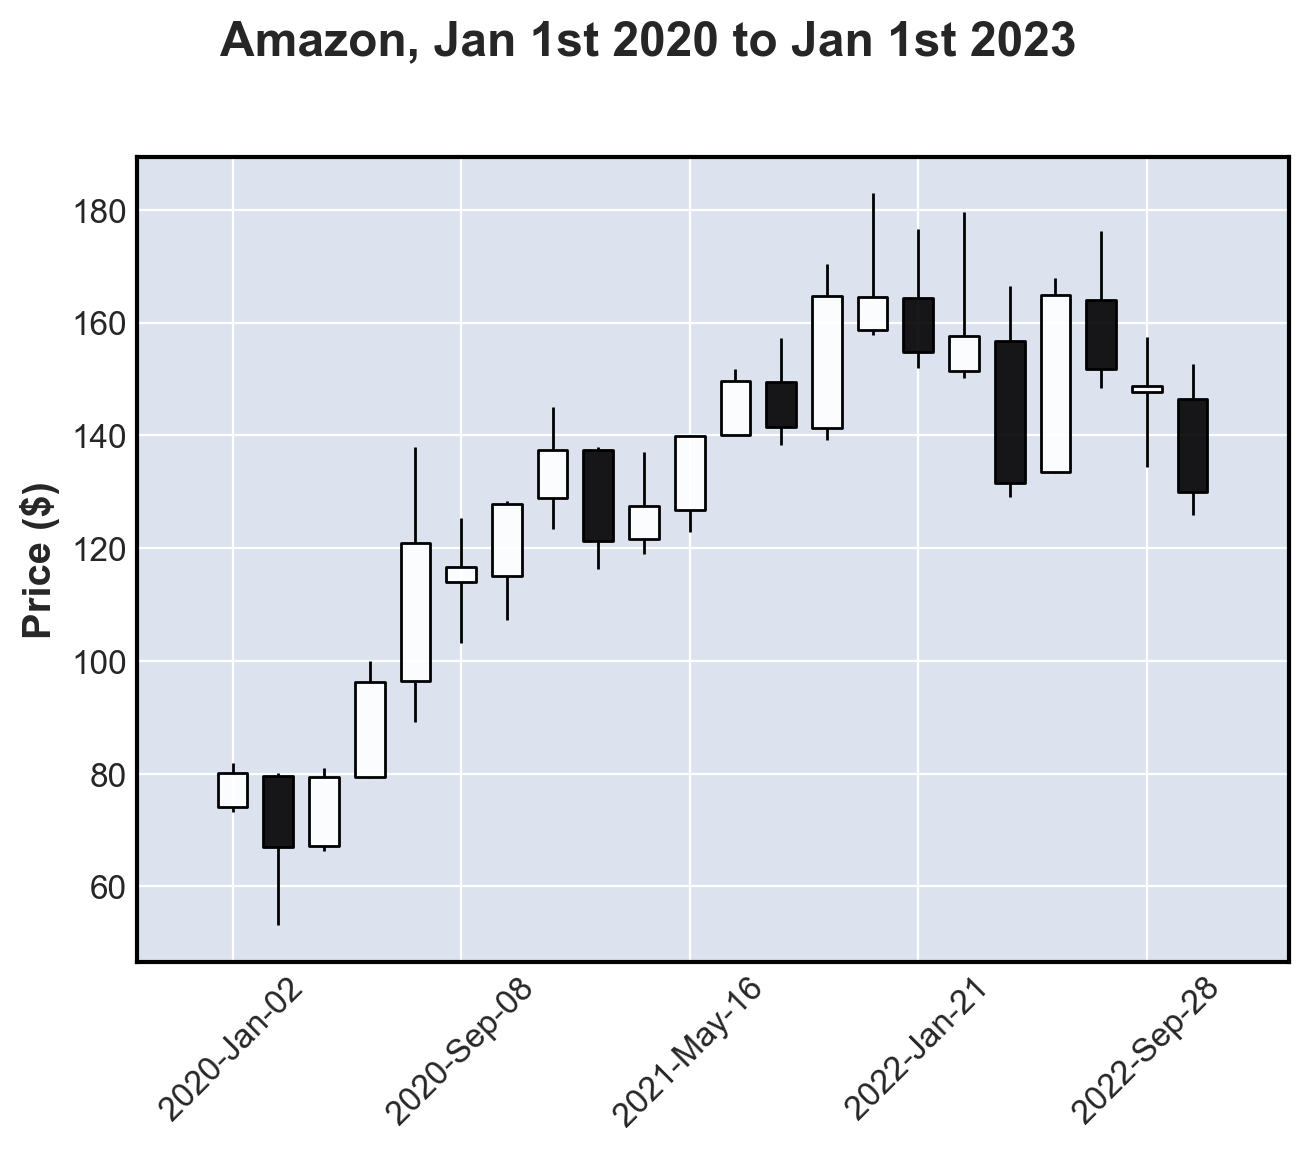

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object
                  Open        High         Low       Close      Volume
Date                                                                  
2020-01-02   74.059998   81.962502   73.187500   80.074997  4426056400
2020-02-21   79.654999   80.112503   53.152500   66.997498  9015135600
2020-04-11   67.077499   81.059998   66.357498   79.485001  4863765200
2020-05-31   79.437500   99.955002   79.302498   96.327499  4750827200
2020-07-20   96.417503  137.979996   89.144997  120.959999  6525166600
2020-09-08  113.949997  125.389999  103.099998  116.599998  5357298100
2020-10-28  115.050003  128.369995  107.320000  127.809998  3764292800
2020-12-17  128.899994  145.089996  123.449997  137.389999  3765184900
2021-02-05  137.350006  137.880005  116.209999  121.209999  3835849700
2021-03-27  121.650002  137.070007  118.860001  127.449997  3142640300
2021-05-16  126.820000  140.000000  122.8600

In [32]:
candlestick_chart(result['data'], 50)

In [39]:
def plot_stock_boxplot(data, columns, figsize=(10, 7), title='Boxplot for stock data'):
    # Conditions if data is in dataframe format
    if not isinstance(data, pd.DataFrame):
        print("Data must be DataFrame")
        return
    
    data_show = data[columns]
    plt.figure(figsize=figsize)
    plt.boxplot(data_show.values, labels=columns)
    plt.title(title, fontsize=16)
    plt.ylabel('Values')
    plt.show()

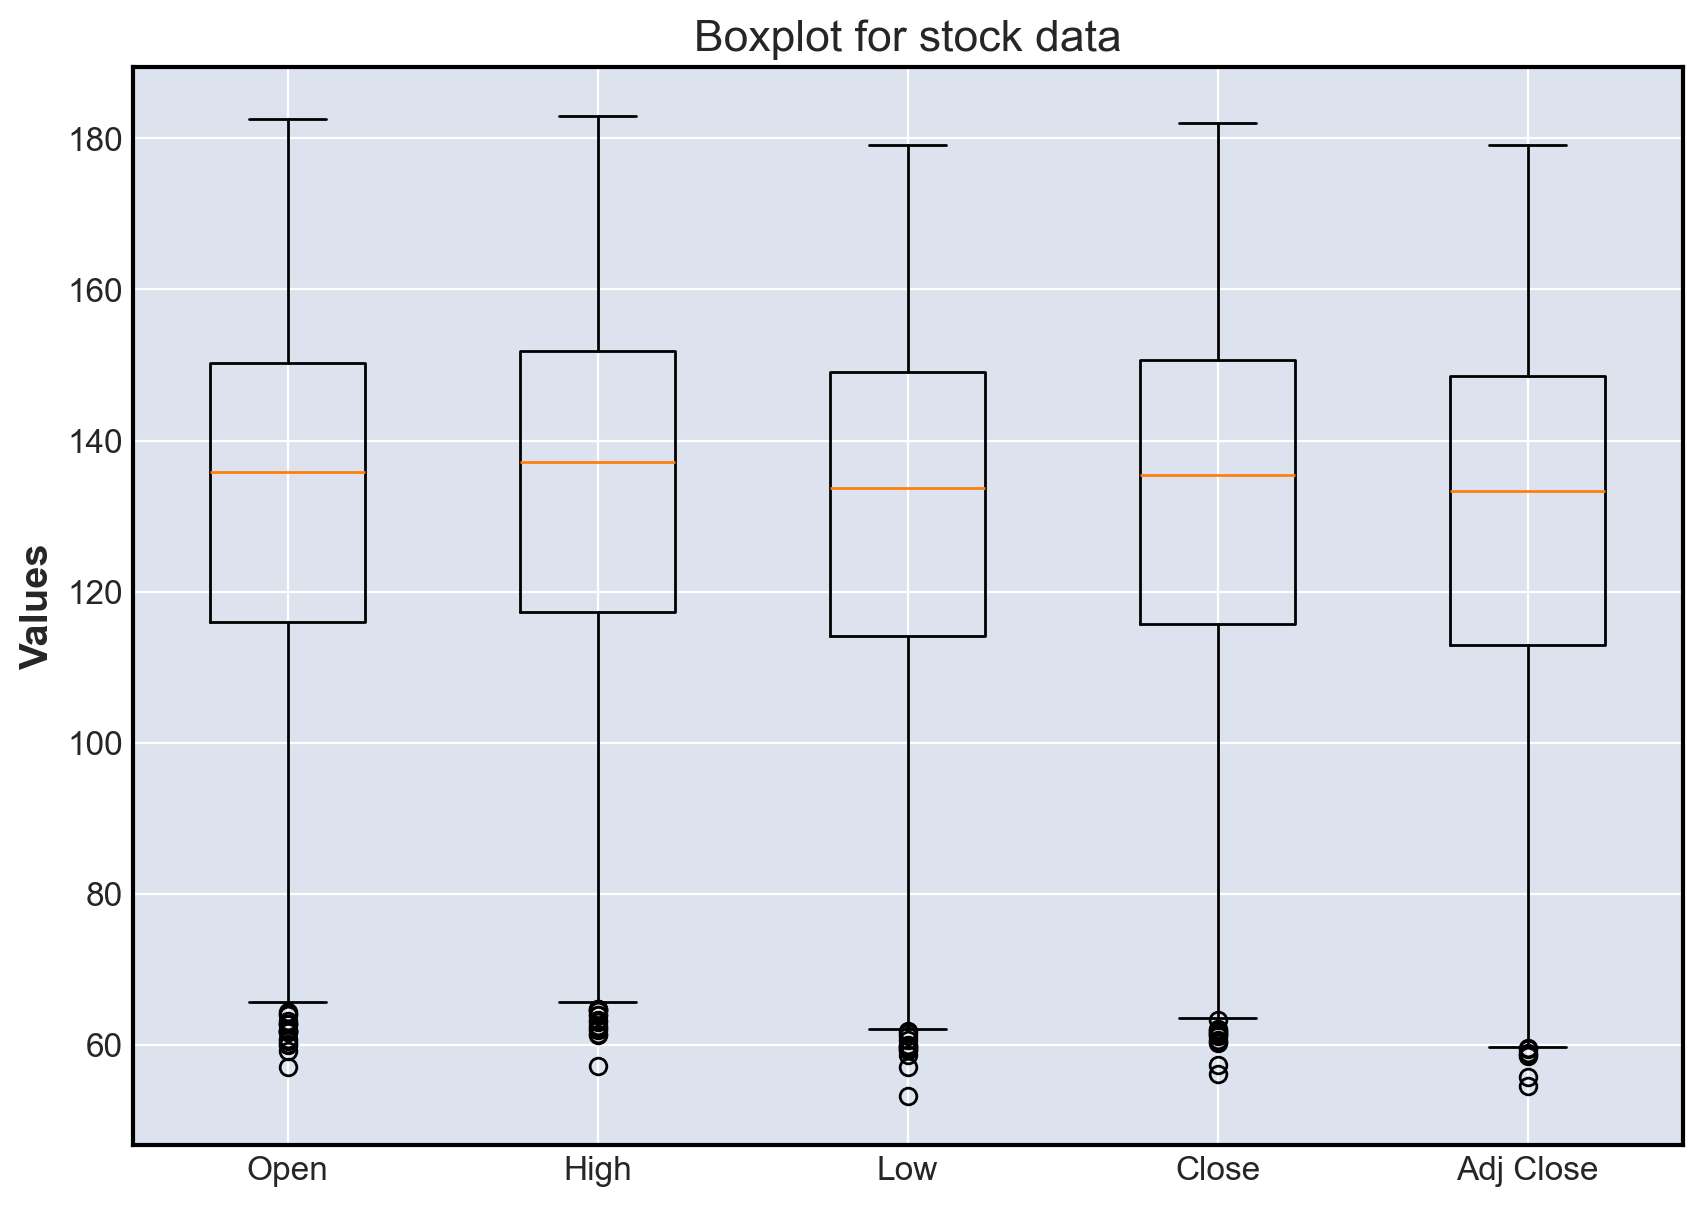

In [40]:
feature_columns = ["Open","High","Low","Close","Adj Close"]

plot_stock_boxplot(result['data'], feature_columns)

In [45]:
def plot_moving_window_boxplot(data, columns, n):
    
    # Check if the window size is within the days provided at the data
    if 1 <= n and n <= len(data):
        # Extract the first 'n' rows for selected columns to create the moving windows
        window_data = data[columns].iloc[:n]
        
        # Create a new figure the specified size for the boxplot
        plt.figure(figsize=(10, 7))
        
        # Generate a boxplot using the values of the selected columns within the moving windows
        plt.boxplot(window_data.values, labels=columns)
        
        # Set the title of the boxplot, incorporating the window size 'n'.
        plt.title(f'Box plot with {n} days', fontsize=16)
        
        # Label the y-axis as 'Values'
        plt.ylabel('Values')
        
        # Display the plot
        plt.show()
    else:
        return f"The window size n must not be lower than 1 and more than rows {len(data)} in the data"

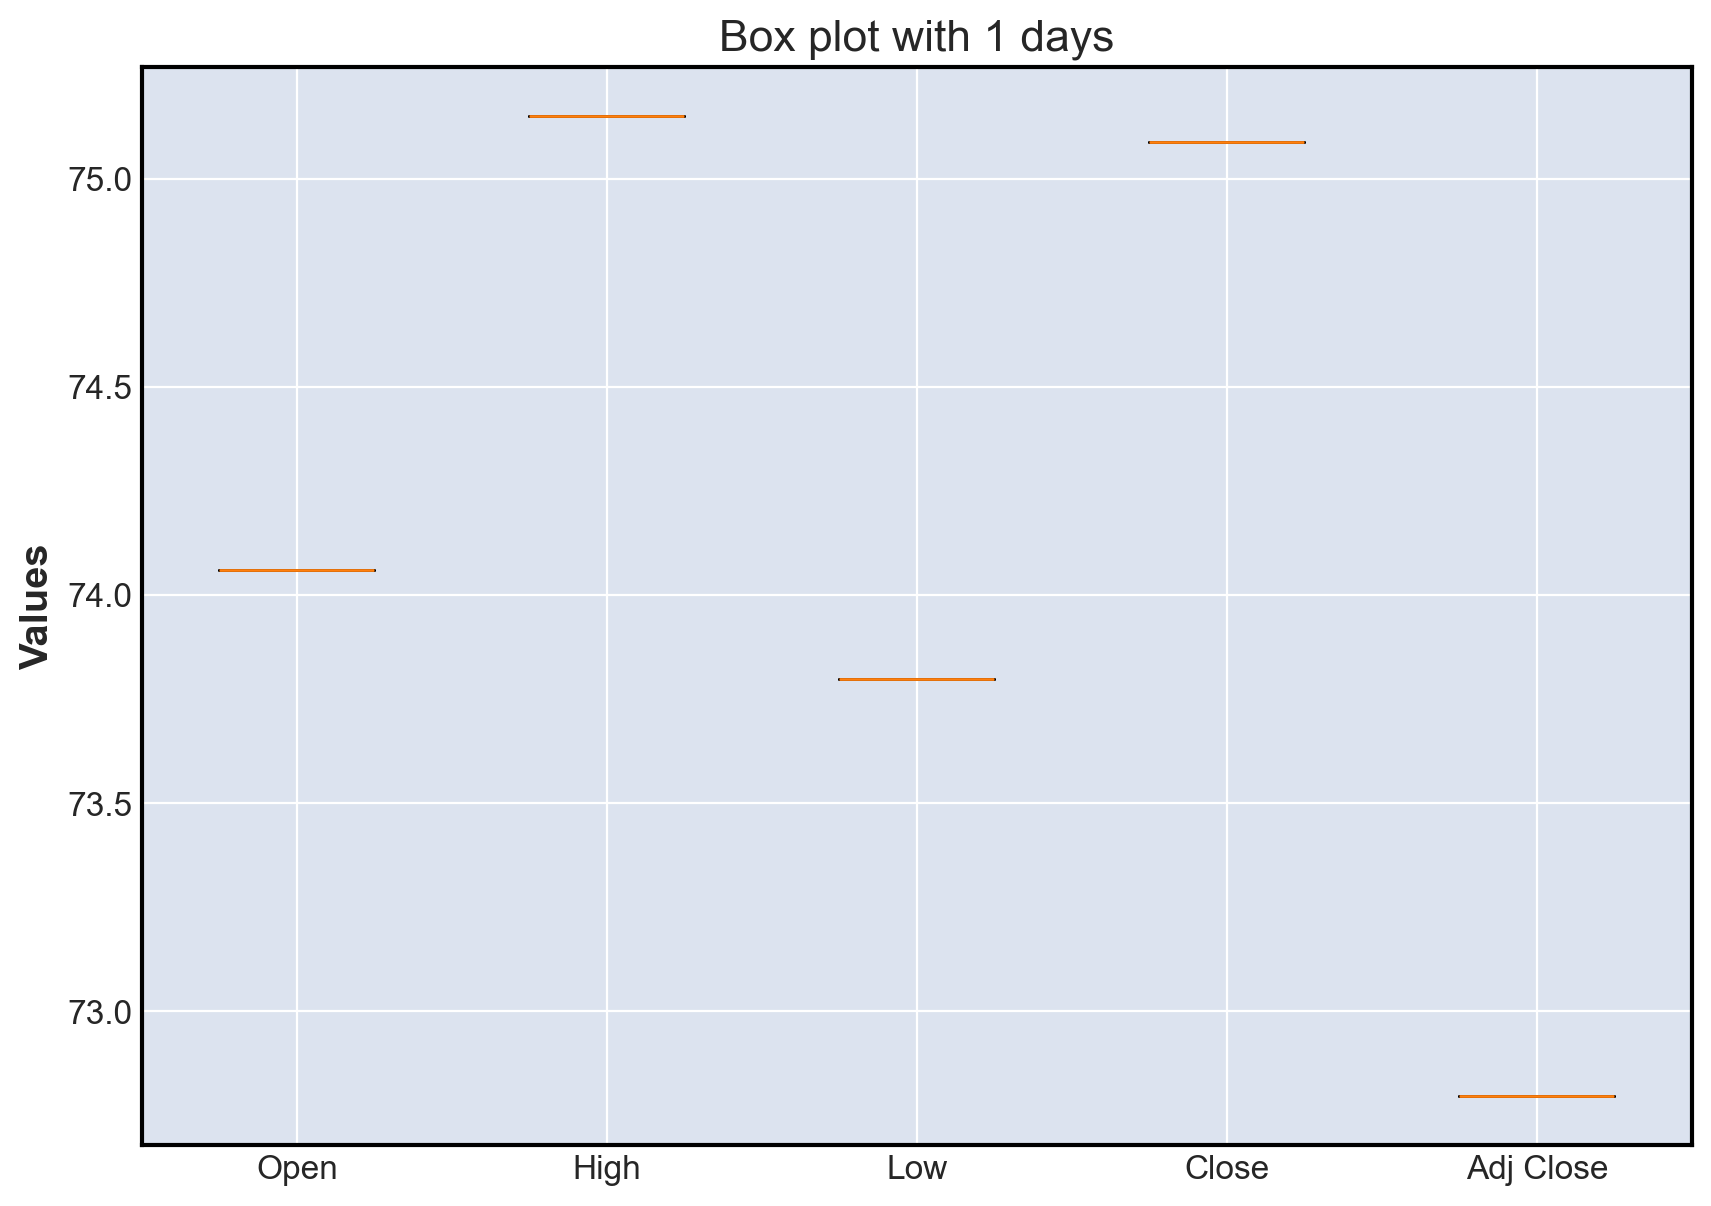

In [46]:
plot_moving_window_boxplot(result['data'], feature_columns, 1)

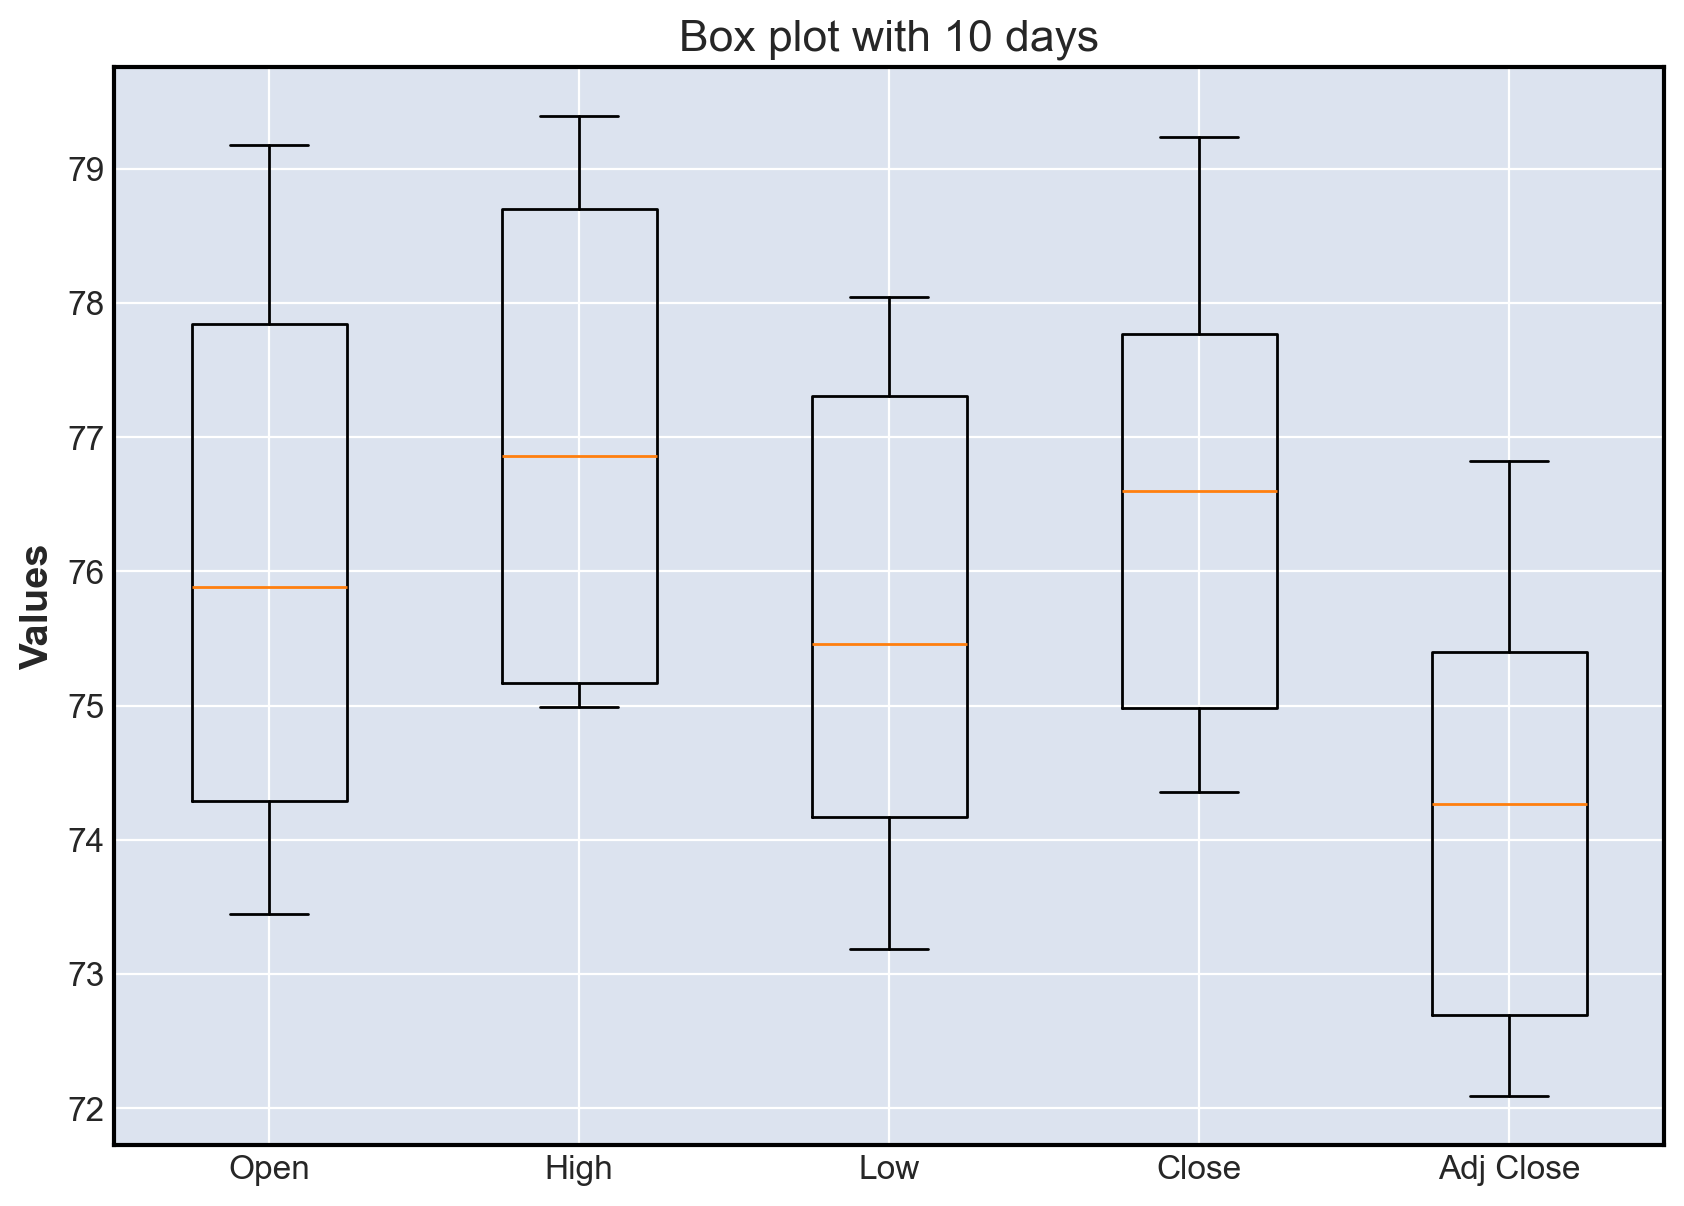

In [47]:
plot_moving_window_boxplot(result['data'], feature_columns, 10)

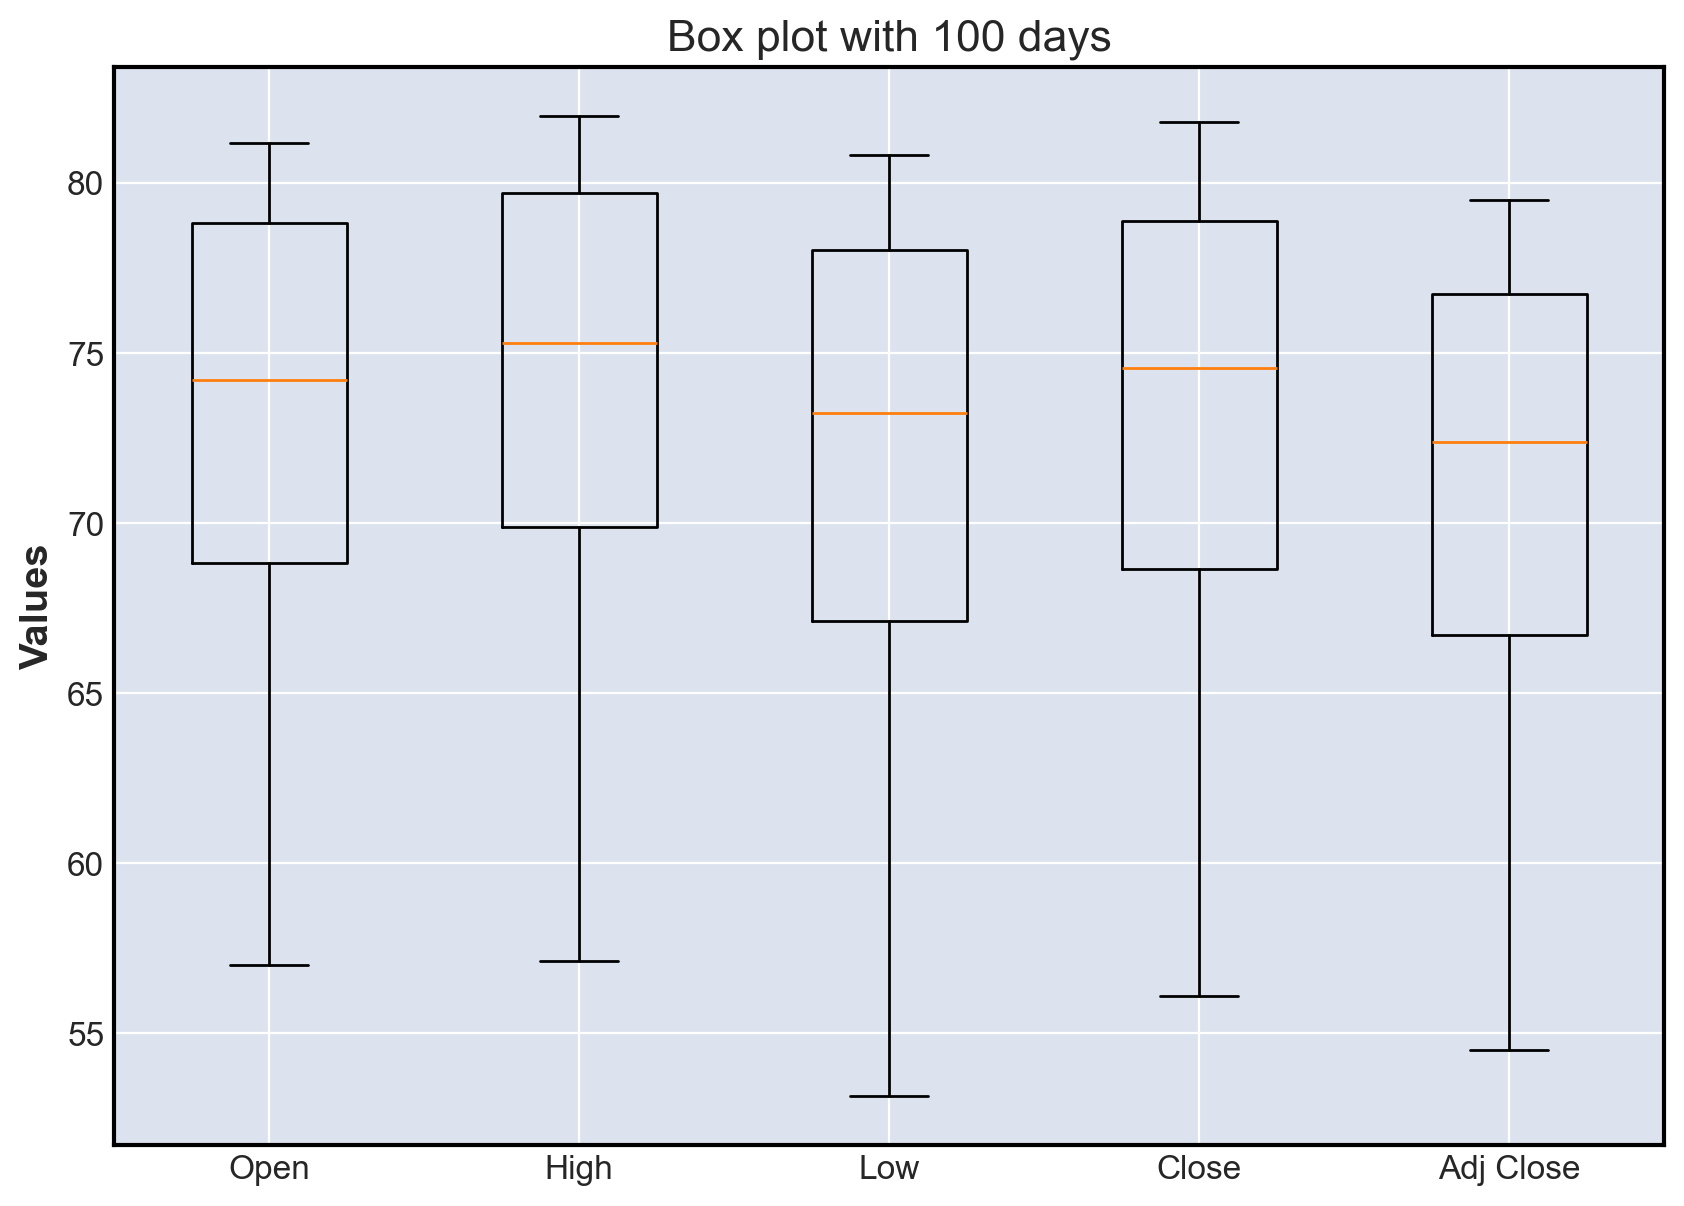

In [48]:
plot_moving_window_boxplot(result['data'], feature_columns, 100)